In [1]:
from matplotlib import pyplot as plt
import struct
import numpy as np
import matplotlib.colors as colors

from scipy import ndimage

In [2]:
#'d'+'iiiiiiii'+'iii'

In [3]:
rec_type = np.dtype([('time', np.float64), ('freqs', np.int32, 8),
                     ('signal', np.int32), ('meditation', np.int32), ('attention', np.int32)])

In [4]:
recs = np.fromfile('./therapy/1610580213.freq', dtype=rec_type)

In [5]:
t, f, sig, med, att =zip(*recs)

In [6]:
t = t - t[0]

In [7]:
freqs = np.array(f).transpose()
freqs = ndimage.uniform_filter1d(np.array(f).transpose(), 5, 1)

In [8]:
ylen, xlen = freqs.shape

In [9]:
y = np.arange(-0.5, 8, 1)
x = list(t.round())

<IPython.core.display.Javascript object>


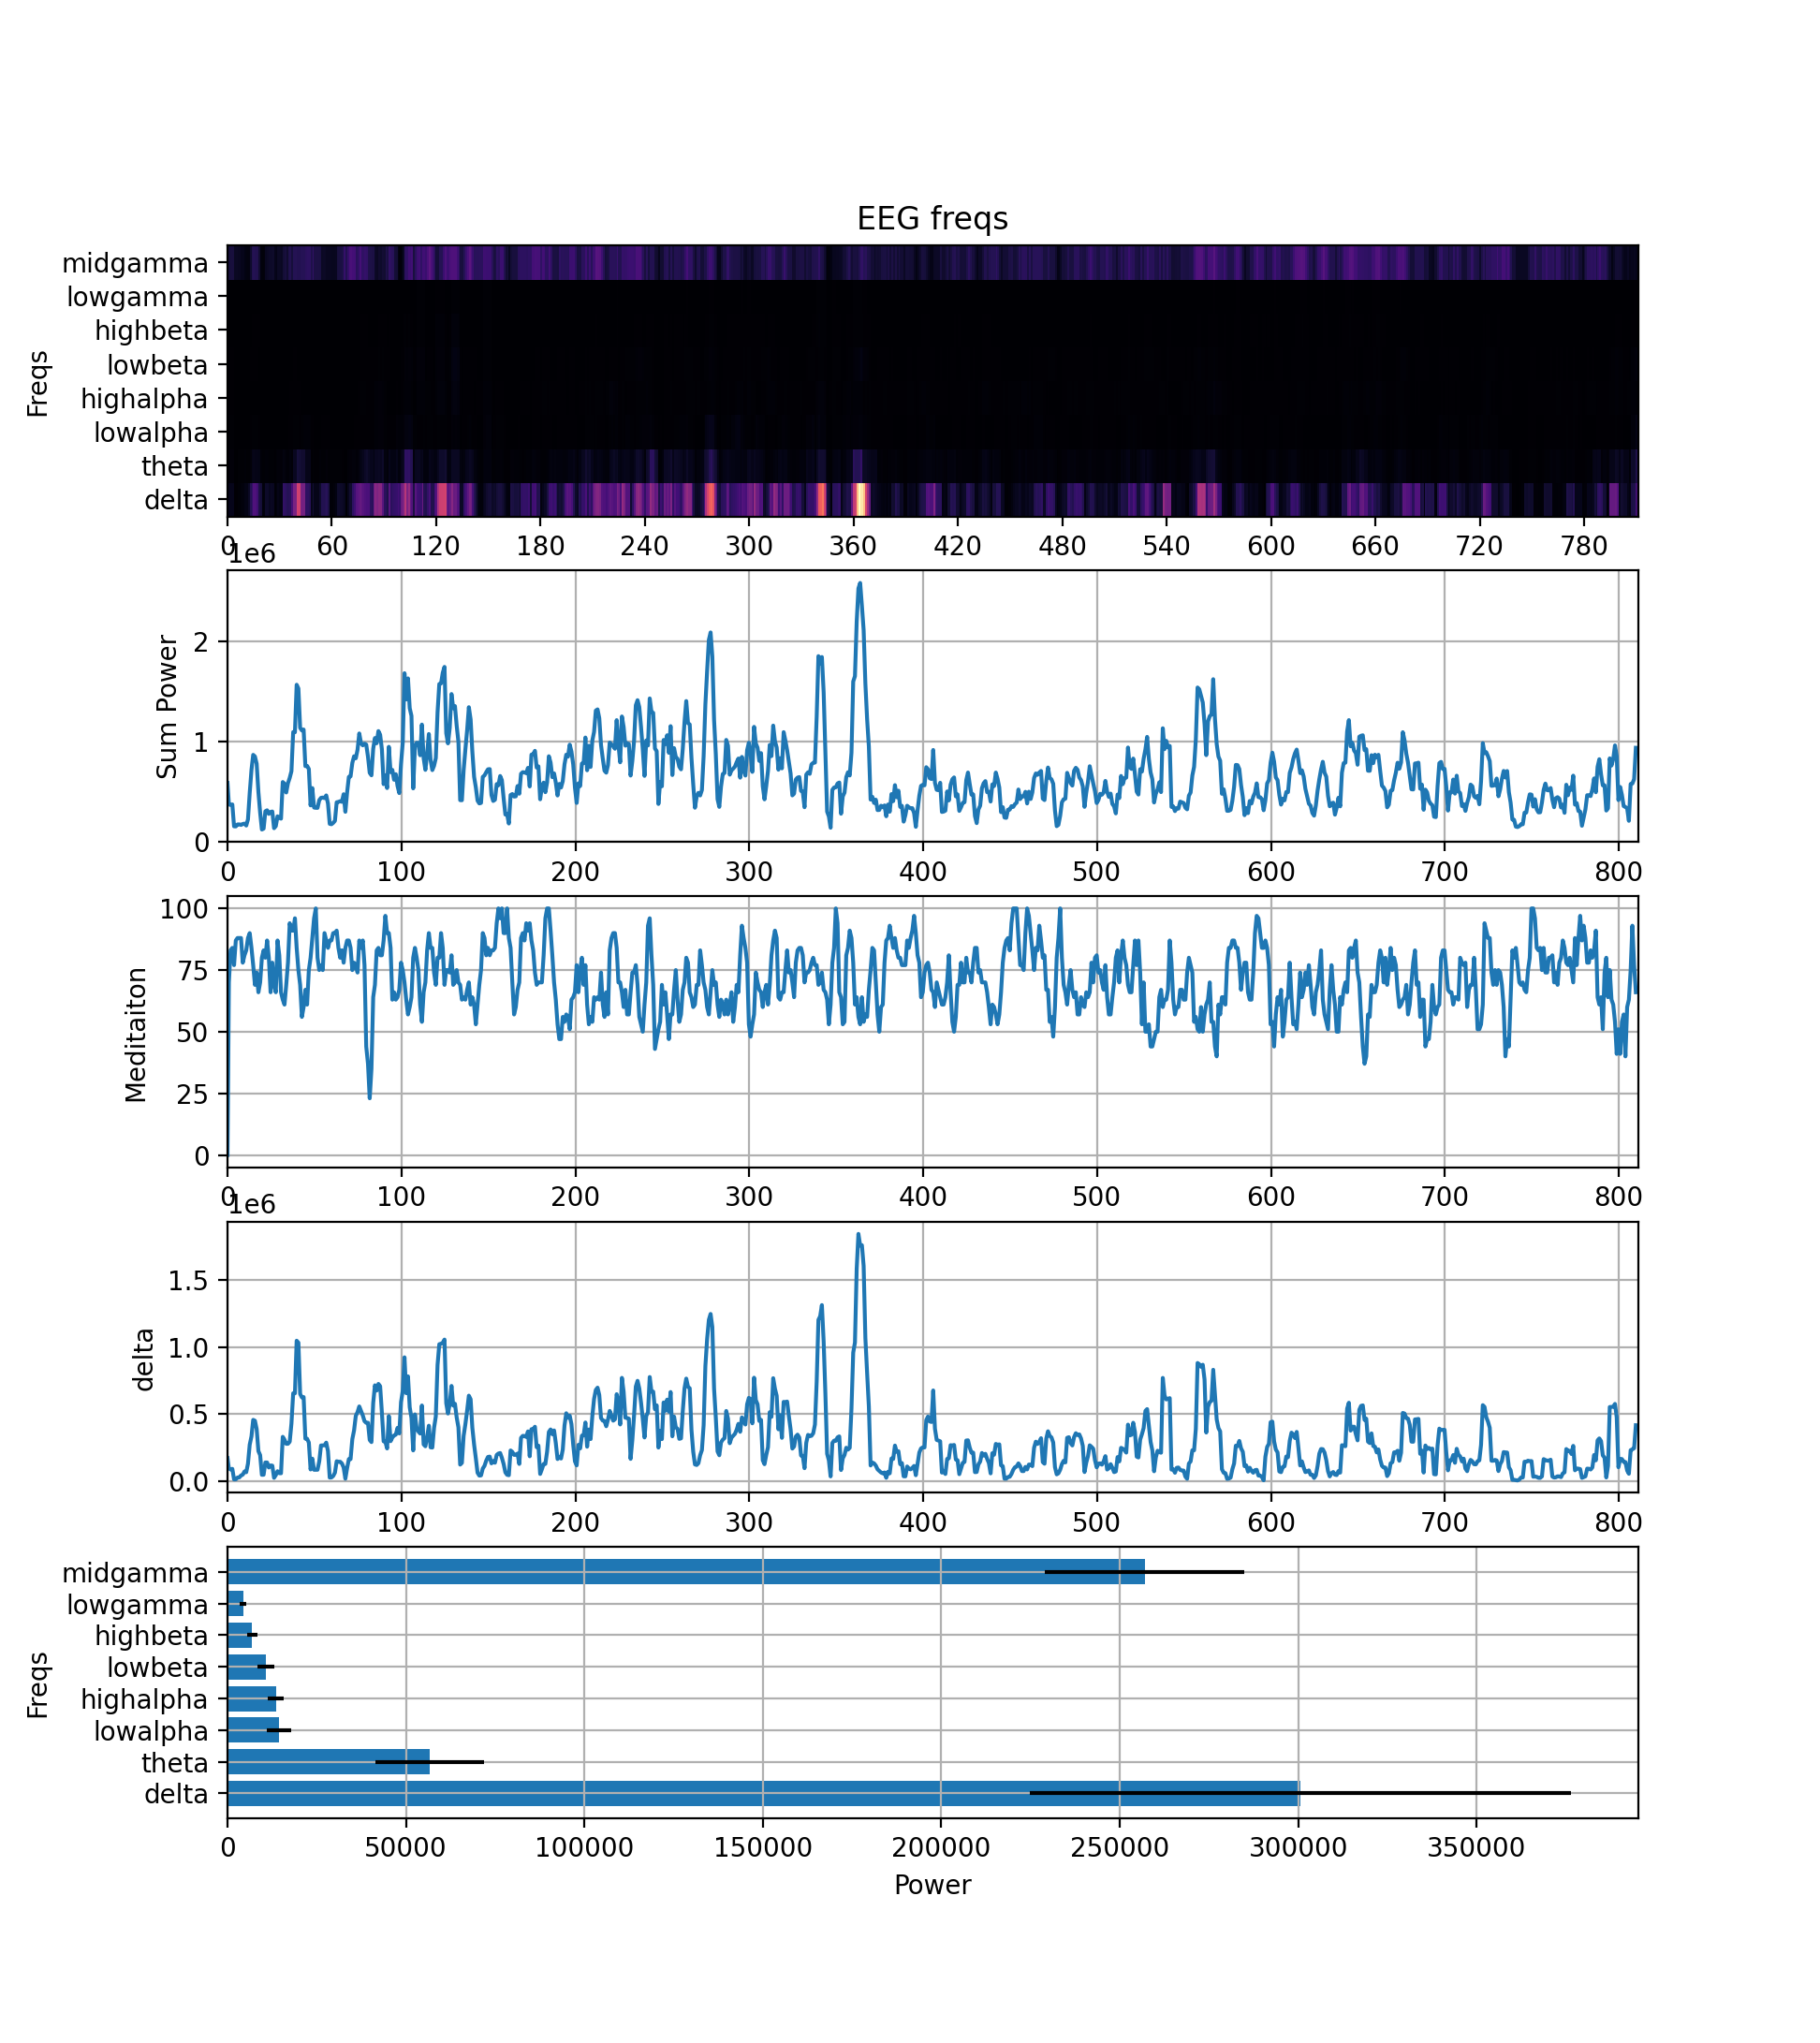

In [10]:
%matplotlib notebook
plt.subplot(511)

#plt.pcolormesh(freqs, cmap='magma', norm=colors.LogNorm(vmin=freqs.min(), vmax=freqs.max()))
plt.pcolormesh(freqs, cmap='magma')
plt.yticks(list([v + 0.5 for v in range(8)]), 'delta theta lowalpha highalpha lowbeta highbeta lowgamma midgamma'.split(' '))
plt.xticks(np.arange(0, xlen, 60))
plt.axis(xmin=0, xmax=xlen)
plt.ylabel("Freqs")
plt.xlabel('Seconds')
plt.title('EEG freqs')

plt.subplot(512)
plt.plot(t, freqs.sum(0))
plt.ylabel("Sum Power")
plt.xlabel('Seconds')
plt.axis(xmin=0, xmax=xlen)
plt.grid(True)

plt.subplot(513)
plt.plot(t, med)
plt.ylabel("Meditaiton")
plt.xlabel('Seconds')
plt.axis(xmin=0, xmax=xlen)
plt.grid(True)

plt.subplot(514)
plt.plot(t, freqs[0,:])
plt.ylabel("delta")
plt.xlabel('Seconds')
plt.axis(xmin=0, xmax=xlen)
plt.grid(True)


plt.subplot(515)
freq_labels = 'delta theta lowalpha highalpha lowbeta highbeta lowgamma midgamma'.split(' ')
y_pos = np.arange(len(freq_labels))
plt.barh(y_pos, freqs.mean(1), xerr=freqs.std(1)*0.3, align='center')
plt.ylabel("Freqs")
plt.xlabel('Power')
plt.yticks(np.arange(8), freq_labels)
plt.grid(True)

plt.show()

